# EDA - Automation

In [1]:
import pandas as pd
import numpy as np
import datetime
import networkx as nx
import nxpd

import matplotlib.pyplot as plt
plt.style.use('ggplot')
import seaborn as sns

import sys
sys.path.insert(0, '../src')
import helpers as h
import visualizations as v

pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', 300)

In [2]:
otc_df = h.load_bitcoin_edge_data('../data/soc-sign-bitcoinotc.csv.gz')

In [48]:
from datetime import datetime, timedelta

epoch = datetime(1970, 1, 1)

def timestamp_microsecond(utc_time):
    td = utc_time - epoch
#     assert td.resolution == timedelta(microseconds=1)
    return (td.days * 86400 + td.seconds) * 10**6 + td.microseconds

otc_df['time'] = otc_df['date'].apply(timestamp_microsecond)

In [49]:
otc_df.head()

,rater,ratee,rating,date,class,binomial_rating,color,penwidth,time
0,6,2,4,2010-11-08 10:45:11,0,1,blue,3,1289213111000000
1,6,5,2,2010-11-08 10:45:41,0,1,blue,2,1289213141000000
2,1,15,1,2010-11-08 11:05:40,0,1,blue,1,1289214340000000
3,4,3,7,2010-11-08 11:41:17,0,1,blue,3,1289216477000000
4,13,16,8,2010-11-08 14:10:54,0,1,blue,4,1289225454000000


In [50]:
df = otc_df.copy()
for i, row in df.iterrows():
    if i != 0:
        curr_date = row['date']
        min_elapsed = (curr_date - df.iloc[i-1]['date']).seconds/60
        df.at[(i,'min_elapsed')] = min_elapsed
df.dropna(inplace=True)

1      0
2     19
3     35
4    149
5      0
Name: min_elapsed, dtype: int64


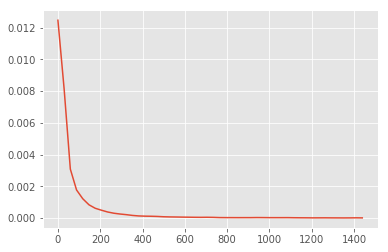

In [15]:
x = df['min_elapsed'].astype(int)
print(x[:5])
from scipy.stats import kde
import matplotlib.pyplot as plt     
density = kde.gaussian_kde(x) # x: list of price
xgrid = np.linspace(x.min(), x.max())   
plt.plot(xgrid, density(xgrid))
plt.show()

In [66]:
import kmeans1d
k = 400
x=df['time']

clusters, centroids = kmeans1d.cluster(x, k)

print(len(clusters))   # [1, 1, 1, 0, 3, 3, 3, 2, 2, 2]
print(centroids)  # [-50.0, 4.1, 94.0, 200.5]

35591
[1289445738035714.0, 1289961048166666.8, 1290858214100000.0, 1291561852687499.8, 1292213277045454.5, 1292872093933333.5, 1293604733750000.0, 1294222313517241.2, 1294768089450000.0, 1295411872450000.0, 1296074577500000.2, 1296680984563636.5, 1297328410200000.5, 1297795658290908.8, 1298185310421052.2, 1298677859363636.5, 1299069296333333.2, 1299594877249999.8, 1300219651718750.0, 1300922849518518.8, 1301400409368420.8, 1301898102507692.2, 1302195208326530.2, 1302608827020408.2, 1302937086858695.2, 1303303472886076.0, 1303685324177570.8, 1304008422603961.5, 1304299363369457.8, 1304558813964102.8, 1304802701384615.0, 1305035470385057.5, 1305246317850000.2, 1305404775098039.0, 1305634578714285.8, 1305896828756577.8, 1306116194426966.0, 1306422773010050.8, 1306771574197802.5, 1306994842450819.2, 1307155826686207.5, 1307322898582329.2, 1307528045007874.2, 1307679826199300.2, 1307847377938460.8, 1308059775533709.2, 1308320372503496.0, 1308649078531073.8, 1308947156656051.2, 1309310970411

In [67]:
df['cluster'] = clusters

In [68]:
df[df['cluster']==4]

,rater,ratee,rating,date,class,binomial_rating,color,penwidth,time,min_elapsed,cluster
77,29,51,1,2010-12-11 04:28:54,0,1,blue,1,1292041734000000,905.050000,4
78,51,29,1,2010-12-11 04:42:58,0,1,blue,1,1292042578000000,14.066667,4
79,29,52,1,2010-12-11 08:33:56,0,1,blue,1,1292056436000000,230.966667,4
80,52,29,1,2010-12-11 08:34:40,0,1,blue,1,1292056480000000,0.733333,4
81,45,39,2,2010-12-11 12:26:00,0,1,blue,2,1292070360000000,231.333333,4
82,45,53,2,2010-12-12 13:28:26,0,1,blue,2,1292160506000000,62.433333,4
83,53,45,2,2010-12-12 13:30:12,0,1,blue,2,1292160612000000,1.766667,4
84,45,54,2,2010-12-12 14:43:48,0,1,blue,2,1292165028000000,73.600000,4
85,54,45,2,2010-12-12 15:04:22,0,1,blue,2,1292166262000000,20.566667,4
86,1,54,1,2010-12-12 15:26:32,0,1,blue,1,1292167592000000,22.166667,4


In [81]:
from sklearn.metrics import silhouette_score, silhouette_samples
import kmeans1d

# k = 40
x=df['time']
a = np.array(x).reshape(-1, 1)
cluster_lst = []
silhouette_lst = []
# for k in range(5,200,5):
for k in range(10,400,10):
    cluster_lst.append(k)
    clusters, centroids = kmeans1d.cluster(x, k)
    silhouette_avg = silhouette_score(a, clusters)
    silhouette_lst.append(silhouette_avg)
# print(f"For n_clusters = {k}\nThe average silhouette_score is : {silhouette_avg}")

Text(0,0.5,'silhouette score')

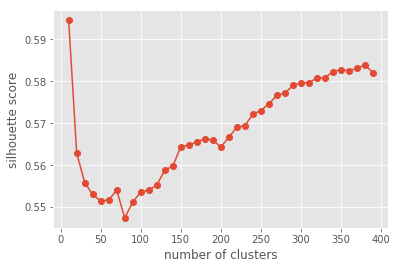

In [82]:
fig, ax = plt.subplots()
ax.plot(cluster_lst, silhouette_lst, 'o-')
ax.set_xlabel("number of clusters")
ax.set_ylabel("silhouette score")

In [ ]:
# need to determine what the cluster member count and range is for the 390 clusters
# maybe member count and range/count??
# how do you tell how dense the clusters are? maybe need to do a silhouette graph?

In [53]:
np.unique(clusters, return_counts=True)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35, 36, 37, 38, 39]),
 array([ 195,  385,  554, 1711, 2576,  781,  682,  494,  665,  677,  717,
         731,  944, 1043, 1014, 1372, 1160, 1084,  962,  903, 1131, 1925,
        1232, 1084, 1207, 1944,  740,  752, 1127,  854,  836,  903,  714,
         694,  453,  398,  268,  329,  214,  136]))

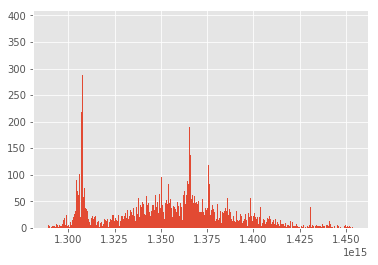

In [60]:
ax = x.hist(bins=1500)


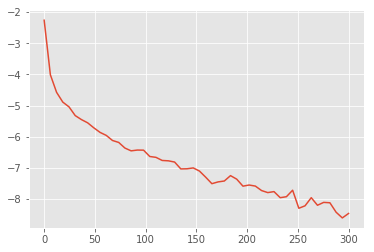

In [24]:
%matplotlib inline

from numpy import array, linspace
from sklearn.neighbors.kde import KernelDensity
from matplotlib.pyplot import plot
a = np.array(x).reshape(-1,1)
kde = KernelDensity(kernel='gaussian').fit(a)
s = linspace(0,300)
e = kde.score_samples(s.reshape(-1,1))
plot(s, e)

In [25]:
from scipy.signal import argrelextrema
mi, ma = argrelextrema(e, np.less)[0], argrelextrema(e, np.greater)[0]
print("Minima:", s[mi])
print("Maxima:", s[ma])

Minima: [ 85.71428571 134.69387755 165.30612245 195.91836735 220.40816327
 232.65306122 251.02040816 269.3877551  293.87755102]
Maxima: [ 91.83673469 146.93877551 183.67346939 202.04081633 226.53061224
 244.89795918 263.26530612 275.51020408]


In [26]:
print(a[a < mi[0]], a[(a >= mi[0]) * (a <= mi[1])], a[a >= mi[1]])

[0 0 1 ... 5 0 3] [19 15 14 ... 18 22 21] [  35  149  366 ...  920 1115   78]


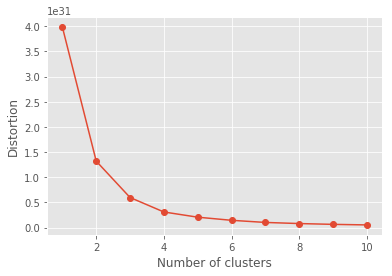

In [51]:
from sklearn.cluster import KMeans

X = df[['time','min_elapsed']]
# calculate distortion for a range of number of cluster
distortions = []
for i in range(1, 11):
    km = KMeans(
        n_clusters=i, init='random',
        n_init=10, max_iter=300,
        tol=1e-04, random_state=0
    )
    km.fit(X)
    distortions.append(km.inertia_)

# plot
plt.plot(range(1, 11), distortions, marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('Distortion')
plt.show()

In [117]:
df_otc_features = pd.read_csv('../data/df_features_otc.csv')
df_otc_velocity = pd.read_csv('../data/df_otc_velocity.csv')

merge_cols = ['ratee','rater','date','rating']
features_df = pd.merge(df_otc_features, df_otc_velocity, on=merge_cols)

features_df.drop(['binomial_rating', 'color', 'penwidth'], inplace=True, axis=1)

In [118]:
df = features_df
# df.info()

### Automation Analysis
- feature velocity_max is for indicating previous usage of automation
- feature velocity_current is for indicating current usage of automation
- Note: Automation can involve the rater using automation or the ratee affected by automation

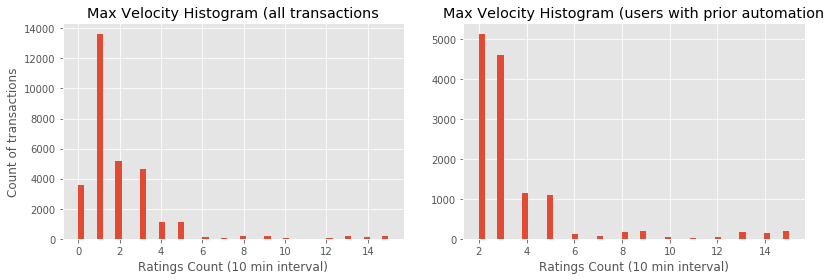

In [135]:
# Histogram of velocity
# velocity_max = 0 signifies that this is the first time we see the user
# velocity_max = 1 signifies that there is no prior automation for this user
fig, axs = plt.subplots(1, 2, figsize=(12,4))
df.hist('velocity_max', bins=50, ax= axs[0])
df[df['velocity_max']>1].hist('velocity_max', bins=50, ax= axs[1])
axs[0].set_title("Max Velocity Histogram (all transactions)")
axs[0].set_ylabel("Count of transactions")
axs[0].set_xlabel("Ratings Count (10 min interval)")
axs[1].set_title("Max Velocity Histogram (users with prior automation)")
axs[1].set_xlabel("Ratings Count (10 min interval)")
plt.tight_layout()

In [177]:
def print_automation_results(df, user_type, threshold):
    """
    Input
        df: dataframe
        user_type: string
        theshold: int - number of ratings within 10 min
    """
    automation_users = len(df[df['velocity_max'] >= threshold].groupby(user_type))
    all_users = len(df.groupby(user_type))
    automation_pct = automation_users / all_users
    print(f'Percentage of {user_type}s using or experiencing automation: {int(automation_pct*100)}% ({automation_users} users)')

threshold = 3
print(f"Assuming {threshold}+ ratings acitivty (combined from both parties) within \n10 minutes signifies automation.\n")
print_automation_results(features_df, 'rater', threshold)
print_automation_results(features_df, 'ratee', threshold)
print('\nNote - These groups may be subsets of each other')

Assuming 3+ ratings acitivty (combined from both parties) within 
10 minutes signifies automation

Percentage of raters using or experiencing automation: 55% (2671 users)
Percentage of ratees using or experiencing automation: 6% (367 users)

Note - These groups may be subsets of each other


### Identify examples
- start with the first negative rating (<= -8)
- later add (df['num_pos_received']>2) & (df['num_pos_received']<8)
- (df['days_active']<=7)  & 

In [179]:
# get users have been rated for the first time with -8 or less
df = df[(df['rating']<=-8) & (df['num_neg_received']==0) & (df['num_pos_received']>=2)]

# user have already received at least 2 positive ratings
df = df[(df['num_pos_received']>=3)]

# user have not been active for more than 2 weeks
df = df[(df['days_active']<=14)]

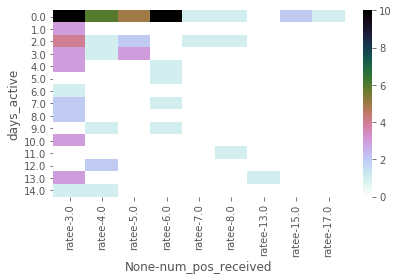

In [180]:
import numpy as np 
from pandas import DataFrame
import seaborn as sns
%matplotlib inline

df2 = df[['ratee','days_active','num_pos_received']].copy()
piv = pd.pivot_table(df2, aggfunc='count',index=["days_active"], columns=["num_pos_received"], fill_value=0)
ax = sns.heatmap(piv, square=False, cmap = 'cubehelix_r')
plt.setp( ax.xaxis.get_majorticklabels(), rotation=90 )
plt.tight_layout()
plt.show()

#### Analysis
- most fraud happens on same day with between 3 and 6 ratings
- to a lesser extent, may have some 3 pos ratings over 1-4 days of activity

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fbaab2234d0>]],
      dtype=object)

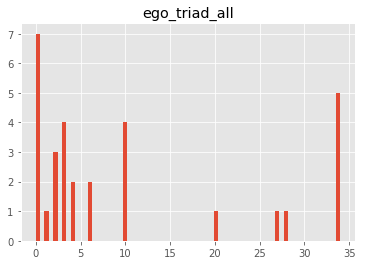

In [181]:
df[(df['days_active']==0) & (df['num_pos_received']<=6)].hist('ego_triad_all', bins=70)

In [184]:
df[(df['days_active']==0) & (df['num_pos_received']<=6)].sort_values('velocity_max')

,rater,ratee,rating,date,class,num_ratings_received,num_neg_received,num_pos_received,neg_ratings_pct,rating_received_sum,rating_received_avg,days_since_first_rated,days_since_last_rated,days_active,successive_neg_rating,ego_triad_300,ego_triad_210,ego_triad_201,ego_triad_120,ego_triad_all,ego_cluster_coef,ego_degree,ego_betweeness,ego_closeness,ego_num_cliques,velocity_current,velocity_max
13704,2067,2621,-10,2012-09-18 05:01:55,1,3.0,0.0,3.0,0.0,9.0,3.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,2.0,0.666667,3.0,0.000000,0.000000,1.0,0.0,1.0
25557,4656,4654,-10,2013-08-04 07:43:47,1,5.0,0.0,5.0,0.0,14.0,2.800000,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.000000,7.0,0.400000,0.400000,5.0,0.0,1.0
25351,4582,4625,-10,2013-07-29 16:50:23,1,5.0,0.0,5.0,0.0,5.0,1.000000,0.0,0.0,0.0,0.0,0.0,0.0,6.0,0.0,6.0,0.000000,9.0,0.800000,0.800000,5.0,0.0,1.0
18983,2388,3552,-10,2013-02-28 14:03:58,1,5.0,0.0,5.0,0.0,37.0,7.400000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.200000,5.0,0.000000,0.000000,4.0,1.0,2.0
25647,905,4666,-10,2013-08-05 12:09:53,1,3.0,0.0,3.0,0.0,18.0,6.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.500000,3.0,0.000000,0.000000,1.0,0.0,2.0
14067,135,2682,-10,2012-09-25 19:24:34,1,3.0,0.0,3.0,0.0,24.0,8.000000,0.0,0.0,0.0,0.0,2.0,2.0,0.0,0.0,4.0,0.833333,6.0,0.083333,1.000000,1.0,0.0,2.0
26105,4444,4731,-10,2013-08-12 18:31:03,1,3.0,0.0,3.0,0.0,3.0,1.000000,0.0,0.0,0.0,0.0,1.0,0.0,2.0,0.0,3.0,0.333333,6.0,0.666667,1.000000,2.0,0.0,3.0
25757,3330,4682,-10,2013-08-05 20:34:59,1,4.0,0.0,4.0,0.0,4.0,1.000000,0.0,0.0,0.0,0.0,7.0,3.0,0.0,0.0,10.0,0.916667,8.0,0.027778,1.000000,1.0,0.0,4.0
25645,905,4661,-10,2013-08-05 12:09:30,1,3.0,0.0,3.0,0.0,21.0,7.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.333333,3.0,0.000000,0.000000,2.0,0.0,4.0
13255,2028,2540,-10,2012-09-06 13:59:23,1,6.0,0.0,6.0,0.0,17.0,2.833333,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,6.0,0.000000,0.000000,6.0,0.0,4.0


### Analysis
- bucket into mutual ratings boost or single use of booster
- see if I catch them with just the velocity metrics
- 


- user 2540 no triads - just has lots of users rate him in a row (bot?)


In [86]:
# Load and preprocess data
otc_df = h.load_bitcoin_edge_data('../data/soc-sign-bitcoinotc.csv.gz')
alpha_df = h.load_bitcoin_edge_data('../data/soc-sign-bitcoinalpha.csv.gz')
alpha_users = h.user_activity_dataframe(alpha_df)
otc_users = h.user_activity_dataframe(otc_df)

In [87]:
# Load graph objects
alpha_G = h.build_graph('alpha', alpha_df)
alpha_pos_G = h.build_graph('alpha', alpha_df, rating_type='pos')
otc_G = h.build_graph('otc',otc_df)
otc_pos_G = h.build_graph('otc',otc_df, rating_type='pos')

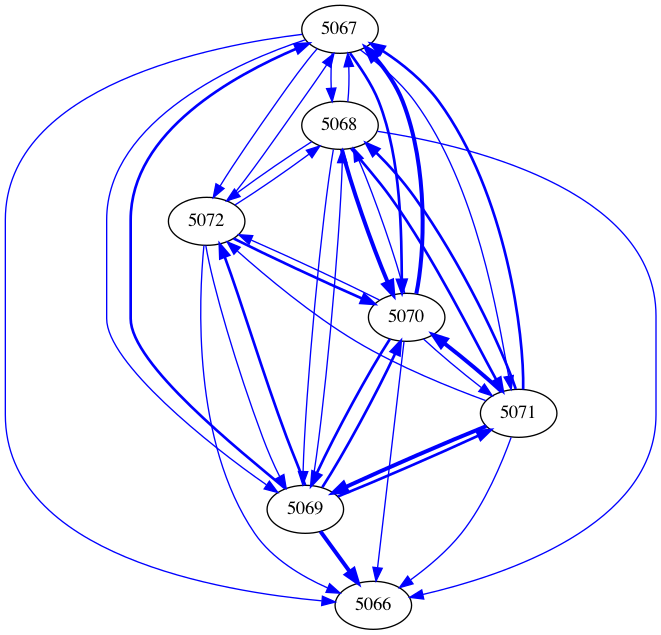

In [110]:
user = 5071
user_g = nx.ego_graph(otc_pos_G.reverse(), user, radius=1)
user_g.graph['rankdir']='TB'
nxpd.draw(user_g, show='ipynb')

       rater  ratee  rating                date  class  binomial_rating color  \
29257   5066   5071       1 2013-11-25 01:25:29      0                1  blue   
29258   5071   5068       3 2013-11-25 01:26:50      0                1  blue   
29259   5071   5067       1 2013-11-25 01:27:07      0                1  blue   
29260   5071   5069       3 2013-11-25 01:27:26      0                1  blue   
29261   5071   5070       1 2013-11-25 01:27:48      0                1  blue   
29262   5068   5071       3 2013-11-25 01:29:51      0                1  blue   
29263   5067   5071       2 2013-11-25 01:30:43      0                1  blue   
29264   5069   5071       5 2013-11-25 01:31:39      0                1  blue   
29266   5070   5071       6 2013-11-25 01:32:41      0                1  blue   
29272   5072   5071       1 2013-11-25 01:41:32      0                1  blue   
29285   2388   5071     -10 2013-11-25 02:19:33      1               -1   red   
29343   2125   5071      -5 

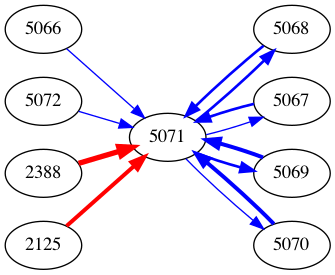

In [111]:
user = 5071

user_df = h.user_data('otc', otc_df, user_type='all', rating_type='all', user=user)#, max_date=date)
user_g = h.build_graph('otc', otc_df, user_lst=[user])
print(user_df)
user_g.graph['rankdir']='LR'
nxpd.draw(user_g, show='ipynb')